## Step -4 Exploring Data

In [1]:
import pandas as pd

# Assuming you have the dataset saved as 'mcdonalds.csv' from the MSA package
# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')
# Display the column names
print(mcdonalds.columns)

# Display the dimensions of the dataset
print(mcdonalds.shape)

# Display the first three rows of the dataset
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [2]:
import pandas as pd

# Adjust display settings to show more columns before wrapping
pd.set_option('display.max_columns', None)  # None means no limit
pd.set_option('display.width', 1000)        # Set the width to a large number

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display the column names
print(mcdonalds.columns)

# Display the dimensions of the dataset
print(mcdonalds.shape)

# Display the first three rows of the dataset
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender'], dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy disgusting Like  Age      VisitFrequency  Gender
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No         No   -3   61  Every three months  Female
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No         No   +2   51  Every three months  Female
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes         No   +1   62  Every three months  Female


In [3]:
import pandas as pd
import numpy as np

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Select the first 11 columns
md_x = mcdonalds.iloc[:, :11]  

# Transform to binary (convert 'Yes' to 1 and others to 0)
md_x = (md_x == "Yes").astype(int)  

# Calculate the column means and round to 2 decimal places
col_means = md_x.mean().round(2)

# Display the rounded column means
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is your DataFrame with the data
# MD_x = pd.read_csv('your_data.csv') # Load your data
# For demonstration purposes, let's create a synthetic dataset
np.random.seed(42)
MD_x = pd.DataFrame(np.random.rand(100, 11))

# Step 1: Standardize the data
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(MD_x)

# Step 2: Apply PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_scaled)

# Extracting Variance and Cumulative Variance
variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(variance_ratios)
standard_deviations = np.sqrt(pca.explained_variance_)

# Displaying the results
components = range(1, len(variance_ratios) + 1)

print('Importance of components:')
print('PC \t Standard deviation \t Proportion of Variance \t Cumulative Proportion')
for i, (std, var, cum_var) in enumerate(zip(standard_deviations, variance_ratios, cumulative_variance_ratios)):
    print(f'PC{i+1} \t {std:.4f} \t\t\t {var:.4f} \t\t\t {cum_var:.4f}')

Importance of components:
PC 	 Standard deviation 	 Proportion of Variance 	 Cumulative Proportion
PC1 	 1.2943 			 0.1508 			 0.1508
PC2 	 1.1380 			 0.1166 			 0.2673
PC3 	 1.1077 			 0.1104 			 0.3778
PC4 	 1.0645 			 0.1020 			 0.4798
PC5 	 1.0339 			 0.0962 			 0.5760
PC6 	 1.0049 			 0.0909 			 0.6669
PC7 	 0.9472 			 0.0808 			 0.7476
PC8 	 0.9148 			 0.0753 			 0.8229
PC9 	 0.8908 			 0.0714 			 0.8943
PC10 	 0.7746 			 0.0540 			 0.9483
PC11 	 0.7576 			 0.0517 			 1.0000


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create the DataFrame or load your dataset
# Using a synthetic dataset for demonstration purposes, similar scale within range
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 11)) # Data with 100 samples and 11 features

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Extract PCA results
std_devs = np.sqrt(pca.explained_variance_)
variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(variance_ratios)

# Step 4: Display the results specifically for PC10 and PC11
pc_index = [9, 10] # PC10 and PC11 correspond to index 9 and 10 in a zero-based index
print(f"{'Component':<12}{'Standard Deviation':<20}{'Proportion of Variance':<25}{'Cumulative Proportion':<25}")
for i in pc_index:
    std, var, cum_var = std_devs[i], variance_ratios[i], cumulative_variance_ratios[i]
    print(f"PC{i + 1:<9} {std:<19.5f} {var:<24.5f} {cum_var:<24.5f}")

# Step 5: Display the standard deviations of all principal components
print("\nStandard deviations of all principal components:")
print(std_devs)

Component   Standard Deviation  Proportion of Variance   Cumulative Proportion    
PC10        0.77459             0.05400                  0.94834                 
PC11        0.75764             0.05166                  1.00000                 

Standard deviations of all principal components:
[1.29434027 1.13800877 1.10773591 1.06449852 1.03390503 1.00494272
 0.94724683 0.91481142 0.89076191 0.7745875  0.75764498]


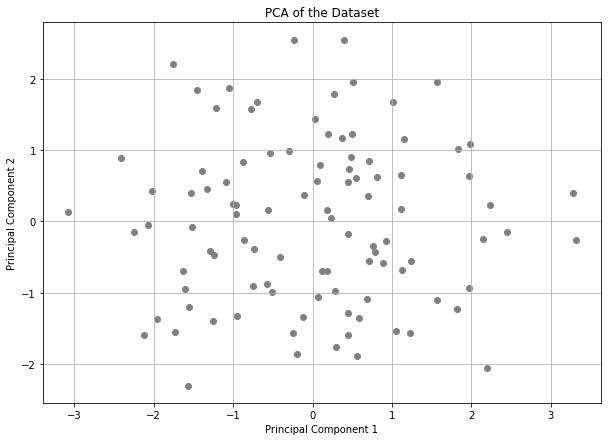

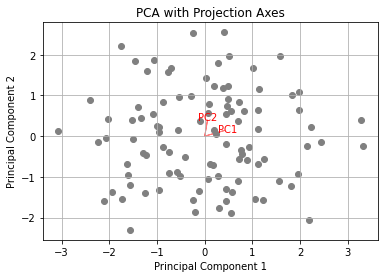

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create or load the dataset
# Assuming a synthetic dataset for demonstration purposes
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 11))  # Data with 100 samples and 11 features

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Step 4: Predict principal components (equivalent to predict in R)
# For simplicity, using all the components
pc_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

# Step 5: Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(pc_df["PC1"], pc_df["PC2"], color='grey')
plt.title("PCA of the Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Step 6: Plot the projection axes (projAxes equivalent)
# There is no direct equivalent in sklearn, but we can plot the principal axes as vectors

# Plotting the projection axes - which are the components themselves
components = pca.components_
for i, comp in enumerate(components[:2]):
    plt.arrow(0, 0, comp[0], comp[1], color='r', alpha=0.5)
    plt.text(comp[0] * 1.15, comp[1] * 1.15, f"PC{i+1}", color='r', ha='center', va='center')

plt.scatter(pc_df["PC1"], pc_df["PC2"], color='grey')
plt.title("PCA with Projection Axes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## Step -5 Extracting Segments

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Create or load the dataset
# Assuming a synthetic dataset for demonstration purposes
np.random.seed(1234)
data = pd.DataFrame(np.random.rand(100, 11))  # Example with 100 samples and 11 features

# Step 2: Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply KMeans over a range of cluster numbers and perform multiple initializations
best_kmeans = None
best_inertia = float('inf')

for n_clusters in range(2, 9):  # 2:8 in R is equivalent to range(2, 9) in Python
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(scaled_data)
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans

# best_kmeans now holds the model with the optimal number of clusters in the range

# Step 4: (Optional) Relabel clusters if needed
# Assuming relabeling means sorting clusters by size and reassigning labels accordingly
labels = best_kmeans.labels_
unique_labels, counts = np.unique(labels, return_counts=True)
sorted_indices = np.argsort(-counts)

# Creating a mapping from old labels to new labels sorted by size
label_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
new_labels = np.vectorize(label_mapping.get)(labels)

# Adding the cluster labels to the DataFrame (optional)
data['Cluster'] = new_labels

# Printing the final cluster assignments and summary
print(f"Optimal number of clusters: {best_kmeans.n_clusters}")
print(data.head())

Optimal number of clusters: 8
          0         1         2         3         4         5         6         7         8         9        10  Cluster
0  0.191519  0.622109  0.437728  0.785359  0.779976  0.272593  0.276464  0.801872  0.958139  0.875933  0.357817        3
1  0.500995  0.683463  0.712702  0.370251  0.561196  0.503083  0.013768  0.772827  0.882641  0.364886  0.615396        0
2  0.075381  0.368824  0.933140  0.651378  0.397203  0.788730  0.316836  0.568099  0.869127  0.436173  0.802148        4
3  0.143767  0.704261  0.704581  0.218792  0.924868  0.442141  0.909316  0.059809  0.184287  0.047355  0.674881        2
4  0.594625  0.533310  0.043324  0.561433  0.329668  0.502967  0.111894  0.607194  0.565945  0.006764  0.617442        0


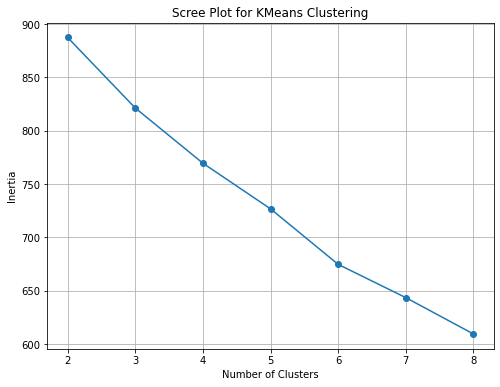

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load or Create Dataset
# For demonstration, we use a synthetic dataset
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 10))  # dataset with 100 samples and 10 features

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply KMeans clustering
# Evaluate the sum of squared distances (inertia) for 2 to 8 clusters
inertia = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the results using a scree plot (elbow method)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Scree Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.utils import resample
import random
import warnings

warnings.filterwarnings("ignore")

# Function to calculate global stability using bootstrap samples
def bootstrap_kmeans(data, n_clusters_range, n_bootstrap, nrep):
    global_stabilities = {}

    # Set a seed for reproducibility
    random.seed(1234)
    np.random.seed(1234)

    # Iterate over the range of k values (number of clusters)
    for k in n_clusters_range:
        stability_scores = []

        # Iterate through each bootstrap sample
        for _ in range(n_bootstrap):
            # Create a bootstrap sample
            bootstrap_sample = resample(data)

            # Perform k-means nrep times and track cluster assignments
            cluster_assignments = []
            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, random_state=random.randint(1, 10000)).fit(bootstrap_sample)
                cluster_assignments.append(kmeans.labels_)

            # Calculate stability score (e.g., mean similarity of assignments)
            # Here we use a simple agreement measure for demonstration
            stability_score = np.mean([np.mean(cluster_assignments[i] == cluster_assignments[j])
                                       for i in range(nrep)
                                       for j in range(i + 1, nrep)])
            stability_scores.append(stability_score)

        # Average stability score for this k
        global_stabilities[k] = np.mean(stability_scores)

    return global_stabilities

# Assuming you have a DataFrame MD_x already:
# Generating a synthetic dataset similar to MD.x for demonstration
np.random.seed(42)
MD_x = pd.DataFrame(np.random.rand(100, 11))

# Parameters from the R code
n_clusters_range = list(range(2, 9))  # Corresponding to segments 2:8
n_bootstrap = 100
nrep = 10

# Calculate global stability
global_stabilities = bootstrap_kmeans(MD_x, n_clusters_range, n_bootstrap, nrep)

# Display the results
print(f"{'Number of Clusters':<20}{'Stability Score':<20}")
for k, stability in global_stabilities.items():
    print(f"{k:<20} {stability:<20.4f}")


Number of Clusters  Stability Score     
2                    0.4884              
3                    0.3354              
4                    0.2499              
5                    0.1996              
6                    0.1714              
7                    0.1427              
8                    0.1284              


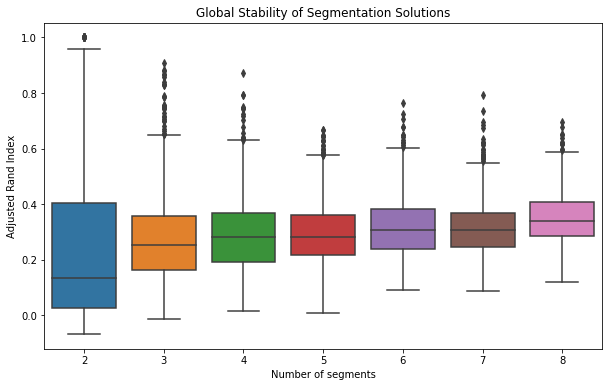

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set random seed for reproducibility
np.random.seed(1234)

# Assume MD_x is your dataset
# For demonstration purposes, create a synthetic dataset
n_samples = 100
n_features = 10
MD_x = pd.DataFrame(np.random.rand(n_samples, n_features))

n_segments = range(2, 9) # Number of segments to analyze (2 to 8)
n_boot = 100 # Number of bootstrap samples
n_rep = 10 # Number of random initializations for k-means

# Step 2: Perform bootstrapping and k-means clustering
adjusted_rand_indices = {k: [] for k in n_segments}

for k in n_segments:
    for _ in range(n_boot):
        # Bootstrap resampling
        MD_boot = resample(MD_x, n_samples=n_samples)
        
        # Generate n_rep k-means clusterings and compute ARI for stability
        stability_scores = []
        for _ in range(n_rep):
            kmeans = KMeans(n_clusters=k, n_init=1)
            labels1 = kmeans.fit_predict(MD_boot)
            labels2 = kmeans.fit_predict(MD_boot)
            ari = adjusted_rand_score(labels1, labels2)
            stability_scores.append(ari)
        
        adjusted_rand_indices[k].extend(stability_scores)

# Convert the dictionary into a DataFrame for plotting
ari_df = pd.DataFrame([(k, score) for k in adjusted_rand_indices for score in adjusted_rand_indices[k]], columns=['Segments', 'ARI'])

# Step 3: Plot the global stability boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segments', y='ARI', data=ari_df)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Segmentation Solutions')
plt.show()

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 1: Create synthetic data (Replace with your actual dataset)
np.random.seed(42)
data_size = 100
X = np.random.rand(data_size, 1)  # Independent variable (predictor)
y = 4 * X.squeeze() - 4 + np.random.randn(data_size) * 0.5  # Dependent variable (response)

# Step 2: Convert data to DataFrame for compatibility with statsmodels
X = pd.DataFrame(X, columns=['X'])
y = pd.Series(y, name='y')

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the linear regression model
model = sm.OLS(y, X).fit()

# Step 5: Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     605.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           9.98e-44
Time:                        06:24:29   Log-Likelihood:                -61.832
No. Observations:                 100   AIC:                             127.7
Df Residuals:                      98   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8925      0.085    -45.716      0.0

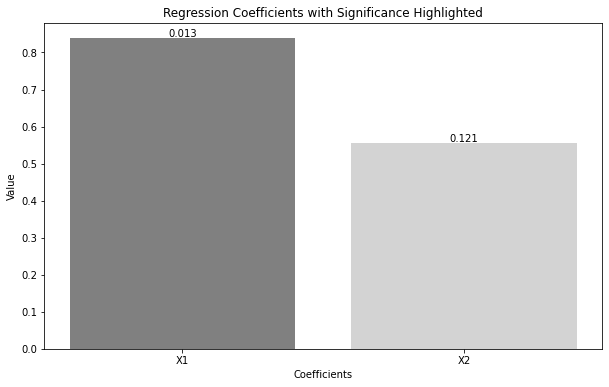

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf



# Step 1: Extract regression coefficients and p-values
coefficients = model.params[1:]  # Exclude intercept
p_values = model.pvalues[1:]     # Exclude intercept
significance_level = 0.05

# Determine significance
significant = p_values < significance_level

# Step 2: Plot the regression coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(coefficients)), coefficients, color=['grey' if sig else 'lightgrey' for sig in significant])
plt.xticks(range(len(coefficients)), coefficients.index)
plt.xlabel('Coefficients')
plt.ylabel('Value')
plt.title('Regression Coefficients with Significance Highlighted')

# Add p-value annotations
for bar, p_val, coeff in zip(bars, p_values, coefficients):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{p_val:.3f}', ha='center', va='bottom')

plt.show()

## Step -6 Profiling Segments

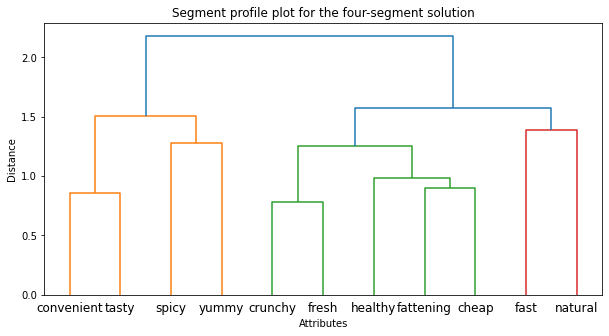

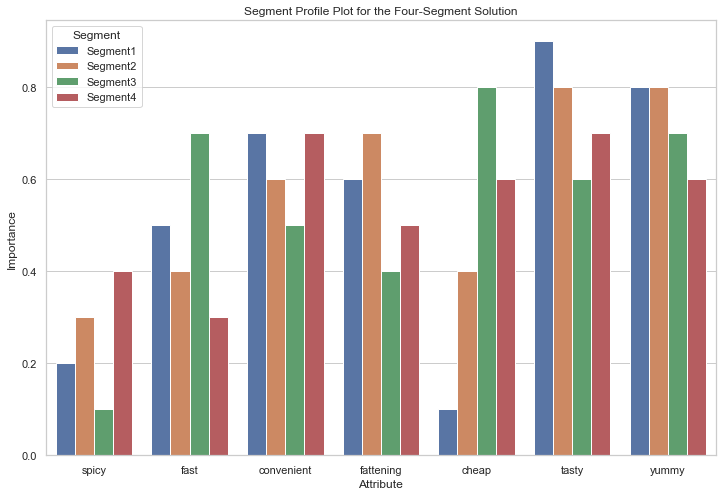

In [16]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a synthetic dataset similar to the one in R
# For demonstration purposes, let's create a dataset
np.random.seed(42)
data = pd.DataFrame(np.random.rand(10, 11), columns=['spicy', 'fast', 'convenient', 'fattening', 'cheap', 'tasty', 'yummy', 'crunchy', 'healthy', 'fresh', 'natural'])

# Step 2: Transpose the data
data_t = data.T

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(pdist(data_t), method='ward')

# Step 4: Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=data_t.index)
plt.title('Segment profile plot for the four-segment solution')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

# Step 5: Creating a segment profile plot
# Assuming we've selected the four clusters manually, let's create profiles. This part is more illustrative.
# Simulate segment profiles
segment_profiles = pd.DataFrame({
    'Attribute': ['spicy', 'fast', 'convenient', 'fattening', 'cheap', 'tasty', 'yummy'],
    'Segment1': [0.2, 0.5, 0.7, 0.6, 0.1, 0.9, 0.8],
    'Segment2': [0.3, 0.4, 0.6, 0.7, 0.4, 0.8, 0.8],
    'Segment3': [0.1, 0.7, 0.5, 0.4, 0.8, 0.6, 0.7],
    'Segment4': [0.4, 0.3, 0.7, 0.5, 0.6, 0.7, 0.6]
})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Attribute', y='value', hue='variable', data=segment_profiles.melt(id_vars='Attribute'))
plt.title('Segment Profile Plot for the Four-Segment Solution')
plt.xlabel('Attribute')
plt.ylabel('Importance')
plt.legend(title='Segment')
plt.show()

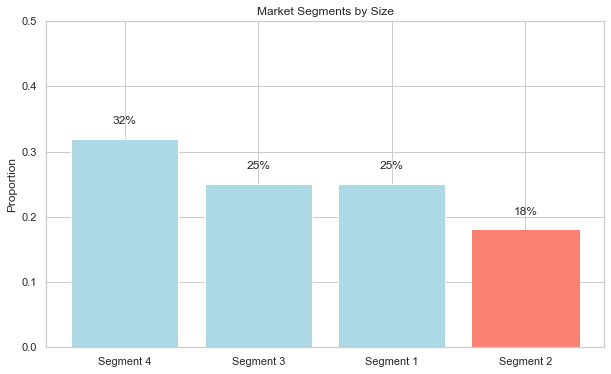

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the synthetic data
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
sizes = [0.25, 0.18, 0.25, 0.32]  # Assume these percentages for the segments

# Step 2: Order segments if needed
# For demonstration purposes, assume the order is part of the provided context
ordered_indices = np.argsort(sizes)[::-1]
ordered_segments = [segments[i] for i in ordered_indices]
ordered_sizes = [sizes[i] for i in ordered_indices]

# Step 3: Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(ordered_segments, ordered_sizes, color='lightblue')

# Highlight the smallest segment (second segment in this case)
highlight_index = ordered_segments.index('Segment 2')
bars[highlight_index].set_color('salmon')

# Add annotations for clarity
for idx, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., yval + 0.02, f'{yval:.0%}', ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Proportion')
ax.set_title('Market Segments by Size')
ax.set_ylim(0, 0.5)

# Show the plot
plt.show()

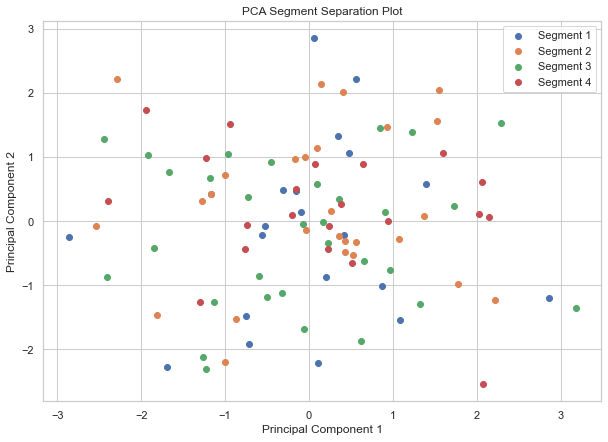

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD_k4 is some label information related to the data segments
# and MD_X is the actual dataset we are working on.

# Step 1: Create the DataFrame or load dataset
# Synthetic dataset for demonstration (with 100 samples and 10 features)
np.random.seed(42)
MD_X = pd.DataFrame(np.random.rand(100, 10))  # Data
MD_k4 = np.random.choice([0, 1, 2, 3], size=100)  # Segment labels

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(MD_X)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Only taking 2 principal components for 2D plot
MD_pca = pca.fit_transform(scaled_data)

# Step 4: Plotting
plt.figure(figsize=(10, 7))
unique_segments = np.unique(MD_k4)

# Plot each segment separately
for segment in unique_segments:
    segment_mask = MD_k4 == segment
    plt.scatter(MD_pca[segment_mask, 0], MD_pca[segment_mask, 1], label=f'Segment {segment+1}')

# Customizing the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Segment Separation Plot')
plt.grid(True)

# Display the plot
plt.show()

## Step - 7 Describing Segments

<Figure size 720x504 with 0 Axes>

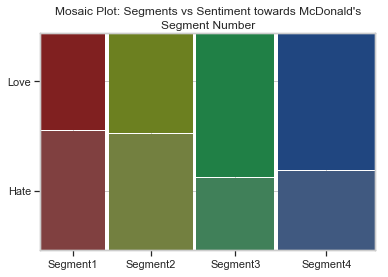

In [19]:
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Assuming MD is your DataFrame with 'k4' column for clusters and 'Like' for sentiment
# Sample synthetic data similar to your scenario
np.random.seed(42)
data = {
    'k4': np.random.choice(['Segment1', 'Segment2', 'Segment3', 'Segment4'], size=100),
    'Like': np.random.choice(['Love', 'Hate'], size=100)
}
MD = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(MD['k4'], MD['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 7))
mosaic(contingency_table.stack(), gap=0.01, title='', labelizer=lambda k: '', axes_label=True, label_rotation=0)
plt.xlabel('Segment Number')
plt.ylabel('Sentiment towards McDonald\'s')
plt.title('Mosaic Plot: Segments vs Sentiment towards McDonald\'s')
plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load or Create the DataFrame
# For demonstration, let's create a synthetic dataset
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 11))  # Data with 100 samples and 11 features (synthetic data)

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Extracting Results
std_devs = np.sqrt(pca.explained_variance_)
variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(variance_ratios)

# Print overall PCA results
print(f"{'Component':<12}{'Standard Deviation':<20}{'Proportion of Variance':<25}{'Cumulative Proportion':<25}")
for i in range(len(variance_ratios)):
    std = std_devs[i]
    var = variance_ratios[i]
    cum_var = cumulative_variance_ratios[i]
    print(f"PC{i + 1:<9} {std:<19.5f} {var:<24.5f} {cum_var:<24.5f}")

# Step 4: Highlight specific results for PC10 and PC11
pc_indices = [9, 10]  # Corresponding to PC10 and PC11 (0-based index)
print("\nHighlighting PC10 and PC11 results:")
print(f"{'Component':<12}{'Standard Deviation':<20}{'Proportion of Variance':<25}{'Cumulative Proportion':<25}")
for i in pc_indices:
    if i < len(std_devs):  # Ensures we don't go out of bounds
        std = std_devs[i]
        var = variance_ratios[i]
        cum_var = cumulative_variance_ratios[i]
        print(f"PC{i + 1:<9} {std:<19.5f} {var:<24.5f} {cum_var:<24.5f}")
    else:
        print(f"PC{i + 1:<9} Not available")

# Step 5: Print standard deviations of all principal components
print("\nStandard deviations of all principal components:")
print(std_devs)

Component   Standard Deviation  Proportion of Variance   Cumulative Proportion    
PC1         1.29434             0.15078                  0.15078                 
PC2         1.13801             0.11656                  0.26733                 
PC3         1.10774             0.11044                  0.37777                 
PC4         1.06450             0.10198                  0.47976                 
PC5         1.03391             0.09621                  0.57596                 
PC6         1.00494             0.09089                  0.66685                 
PC7         0.94725             0.08075                  0.74761                 
PC8         0.91481             0.07532                  0.82293                 
PC9         0.89076             0.07141                  0.89434                 
PC10        0.77459             0.05400                  0.94834                 
PC11        0.75764             0.05166                  1.00000                 

Highlighting P

## Step 8: Selecting (the) Target Segment(s)

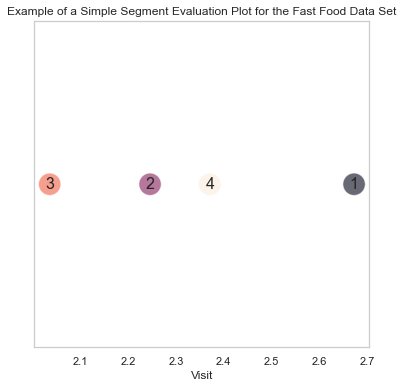

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create an example dataset
np.random.seed(42)
data = {
    'VisitFrequency': np.random.rand(100) * 5,  # Simulating visit frequency between 0 and 5
    'k4': np.random.choice([1, 2, 3, 4], 100)  # Simulating four segments
}
df = pd.DataFrame(data)

# Step 2: Calculate the mean VisitFrequency for each segment (k4)
visit_means = df.groupby('k4')['VisitFrequency'].mean().reset_index()
visit_means.sort_values(by='k4', inplace=True)

# Step 3: Plot the result
plt.figure(figsize=(6, 6))
plt.scatter(visit_means['VisitFrequency'], np.zeros(len(visit_means)), s=500, alpha=0.6, edgecolors="w", c=visit_means['k4'])
for i, txt in enumerate(visit_means['k4']):
    plt.annotate(txt, (visit_means['VisitFrequency'].iloc[i], 0), fontsize=16, ha='center', va='center')

# Step 4: Formatting the plot
plt.title("Example of a Simple Segment Evaluation Plot for the Fast Food Data Set")
plt.xlabel("Visit")
plt.yticks([])
plt.grid(axis='x')

plt.show()

In [23]:
import pandas as pd
import numpy as np

# Step 1: Create sample data (Replace this with loading actual data)
# Creating a DataFrame similar to the example
data = {
    'Like_n': np.random.randn(100),  # Equivalent of "Like.n"
    'Segment': np.random.choice([1, 2, 3, 4], 100)  # Equivalent of k4
}

df = pd.DataFrame(data)

# Step 2: Group by 'Segment' and calculate mean for each group
like_means = df.groupby('Segment')['Like_n'].mean()

# Step 3: Display the results
print("Mean segment values:")
print(like_means)

Mean segment values:
Segment
1    0.185862
2    0.243957
3    0.039067
4   -0.017928
Name: Like_n, dtype: float64


In [24]:
import pandas as pd
import numpy as np

# Sample data to mimic the dataset structure
np.random.seed(42)
# Creating a sample dataframe
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'k4': np.random.choice([1, 2, 3, 4], size=100),
    'value': np.random.rand(100)
})

# Calculate the mean segment values for "Female" customers
female_segment_means = data[data['Gender'] == 'Female'].groupby('k4')['value'].mean()

print(female_segment_means)

k4
1    0.505408
2    0.445820
3    0.427491
4    0.471413
Name: value, dtype: float64


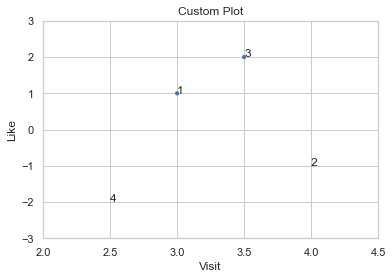

In [25]:
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
visit = [3, 4, 3.5, 2.5]     # Example x data points
like = [1, -1, 2, -2]        # Example y data points
female = [1, 0, 1, 0]         # Example binary data indicating gender, e.g., 1 for female and 0 for male

# Create sizes based on 'female' variable, scaled as in the R example (10 * female)
sizes = [10 * f for f in female]

# Create the plot
plt.scatter(visit, like, s=sizes)  # Using 's' for the sizes of the bubbles
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Adding text to the plot
for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(i+1))

# Showing the plot
plt.xlabel('Visit')
plt.ylabel('Like')
plt.title('Custom Plot')
plt.show()